In [1]:
import numpy as np
import sympy
from anon.quad import quad_points
from sympy import Function, Symbol, Rational
import matplotlib.pyplot as plt
plt.style.use("typewriter")
from IPython.display import display

In [2]:
a1, a2 = sympy.symbols("a1 a2")

def linspace(start,stop,num):
    return [Rational(stop-start,num-1)*i + start for i in range(num)]


def lagrange(i,order)->Function:
    x = Symbol('xi')
    x_ = linspace(-1,1,order+1)

    li = 1
    for m in range(0,order+1):
        if i != m:
            li *= (x-x_[m])/(x_[i] - x_[m])   
    return li
    

In [3]:
phi = [lagrange(i,4).expand() for i in range(5)]
for i in range(5):
    print(phi[i])

2*xi**4/3 - 2*xi**3/3 - xi**2/6 + xi/6
-8*xi**4/3 + 4*xi**3/3 + 8*xi**2/3 - 4*xi/3
4*xi**4 - 5*xi**2 + 1
-8*xi**4/3 - 4*xi**3/3 + 8*xi**2/3 + 4*xi/3
2*xi**4/3 + 2*xi**3/3 - xi**2/6 - xi/6


In [4]:
# xi = (phi[0].free_symbols)[0]

In [5]:
for i in range(5):
    print(f"\\phi_{i} = {sympy.latex(lagrange(i,4).expand())}")
#     display(lagrange(0,4).expand())

\phi_0 = \frac{2 \xi^{4}}{3} - \frac{2 \xi^{3}}{3} - \frac{\xi^{2}}{6} + \frac{\xi}{6}
\phi_1 = - \frac{8 \xi^{4}}{3} + \frac{4 \xi^{3}}{3} + \frac{8 \xi^{2}}{3} - \frac{4 \xi}{3}
\phi_2 = 4 \xi^{4} - 5 \xi^{2} + 1
\phi_3 = - \frac{8 \xi^{4}}{3} - \frac{4 \xi^{3}}{3} + \frac{8 \xi^{2}}{3} + \frac{4 \xi}{3}
\phi_4 = \frac{2 \xi^{4}}{3} + \frac{2 \xi^{3}}{3} - \frac{\xi^{2}}{6} - \frac{\xi}{6}


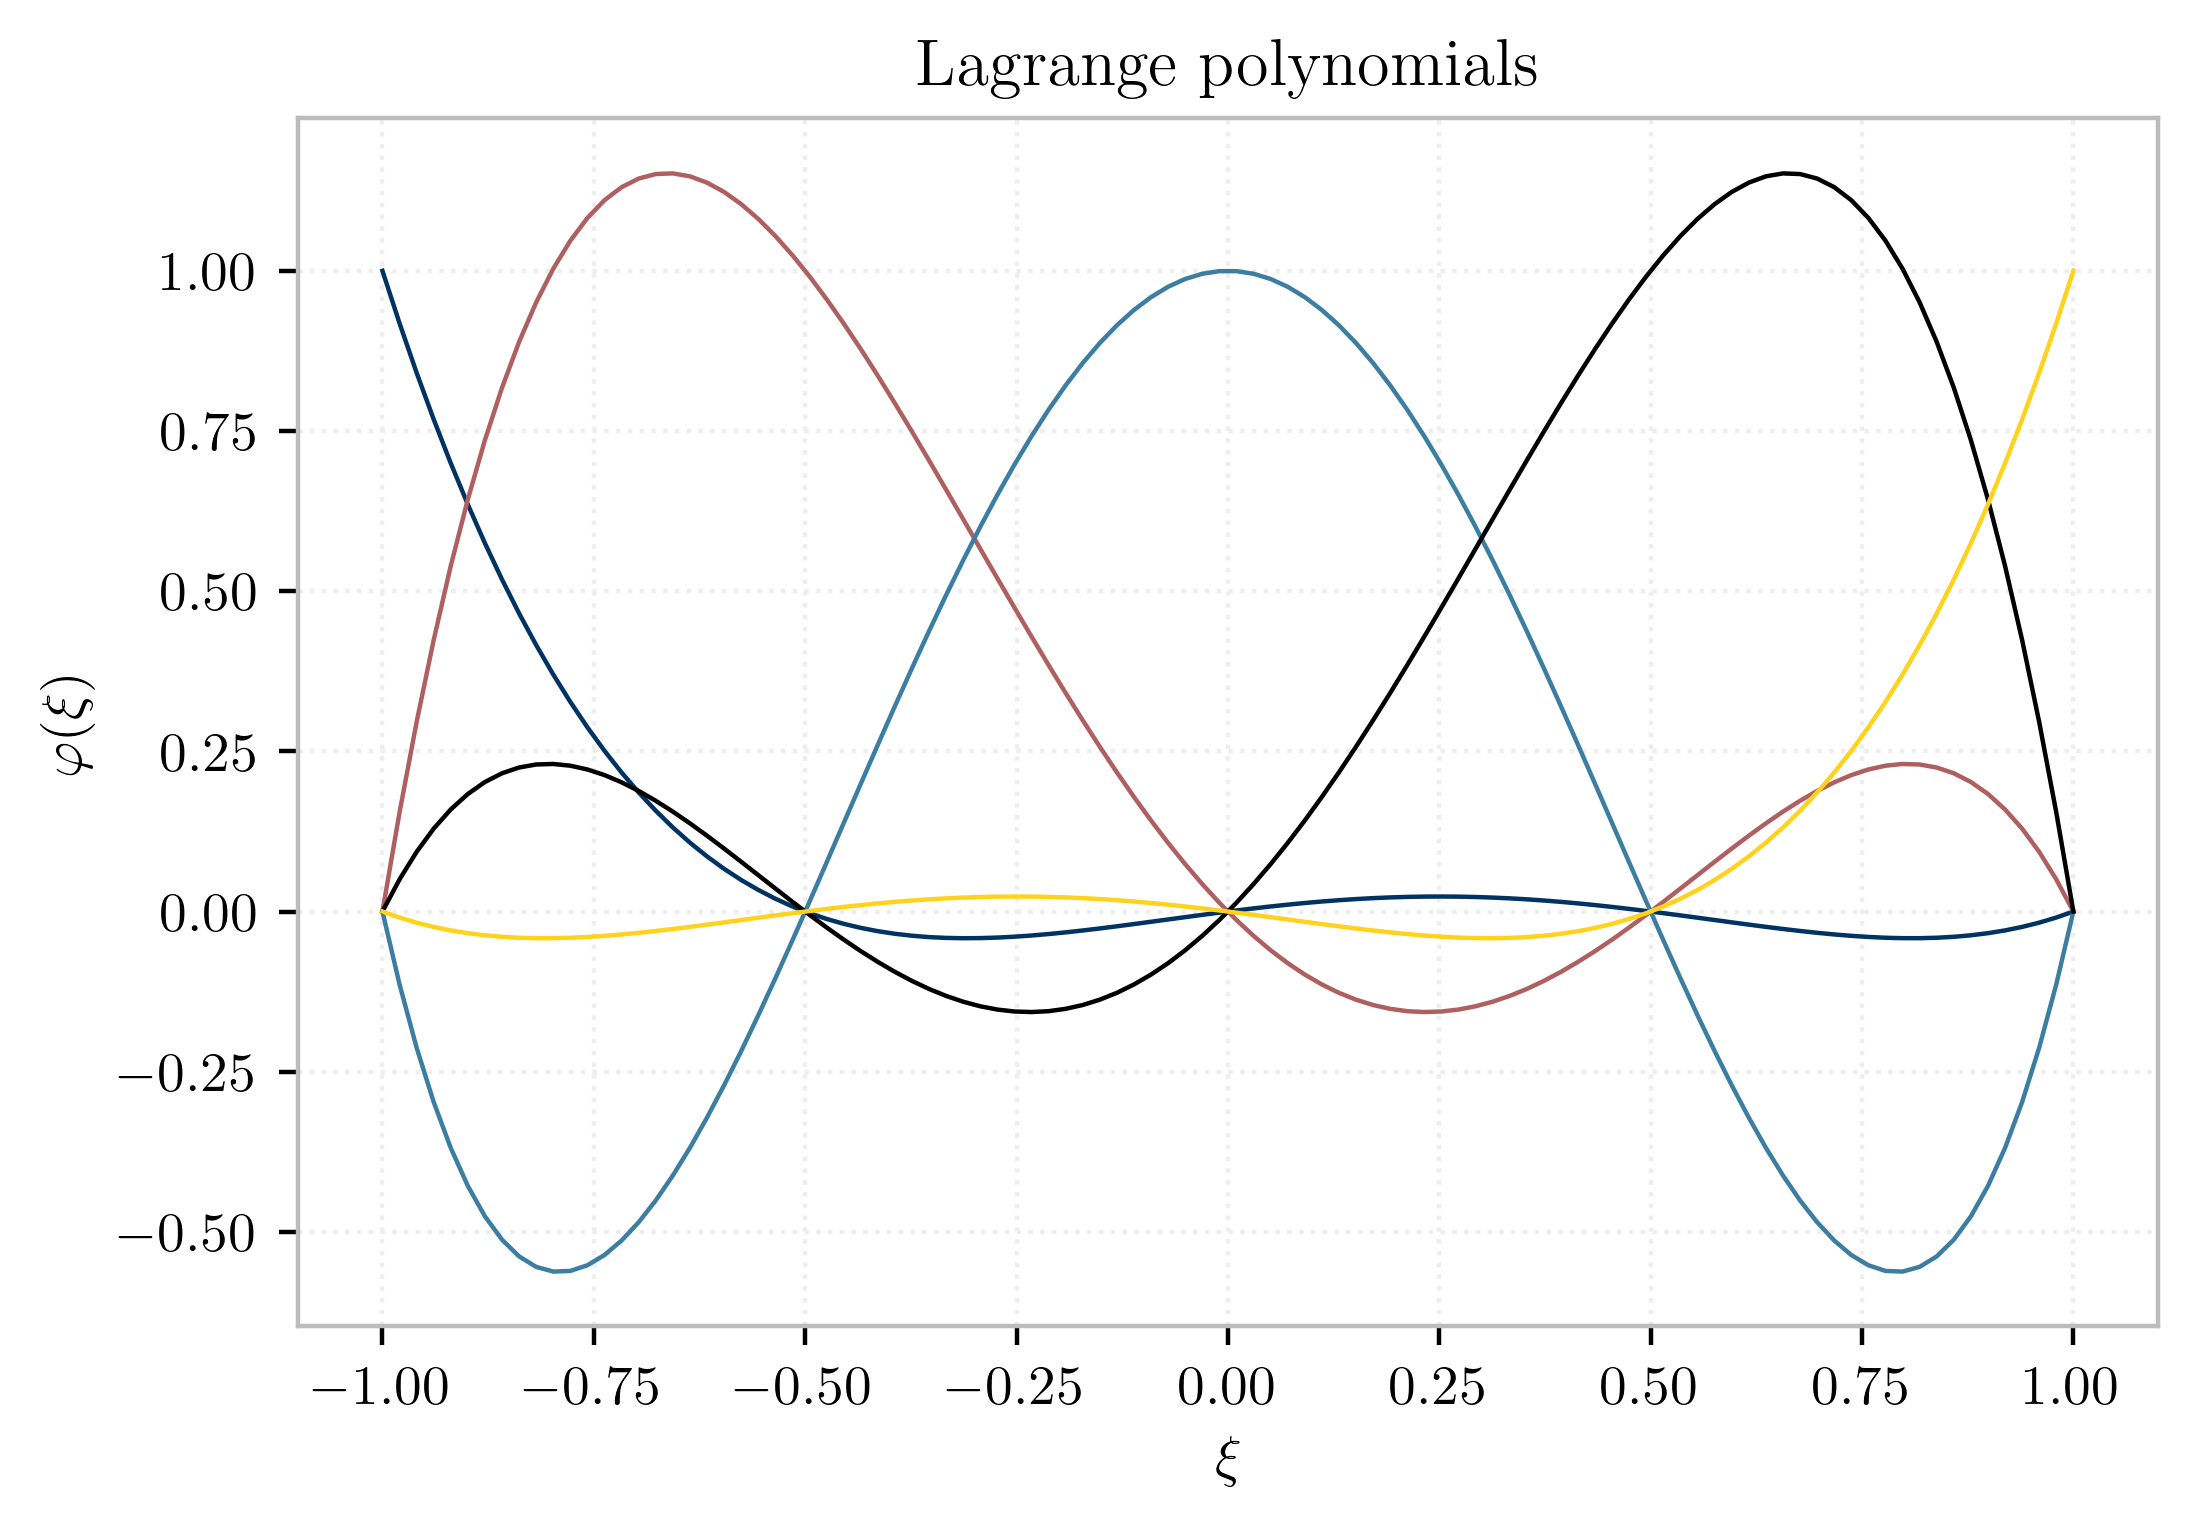

In [39]:
fig, ax = plt.subplots()
for i in range(5):
    ax.plot(*zip(*[
        [xi, float(lagrange(i,4).subs({"xi": xi}).doit())]
        for xi in np.linspace(-1,1,100)
    ]))
ax.set_xlabel("$\\xi$")
ax.set_ylabel("$\\varphi(\\xi)$");
ax.set_title("Lagrange polynomials")
fig.savefig("./img/lagrange.png")

## Derivatives

In [7]:
grad_phi = [
    lagrange(i,4).expand().diff() for i in range(5)
]
for i in range(5):print(grad_phi[i])

8*xi**3/3 - 2*xi**2 - xi/3 + 1/6
-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3
16*xi**3 - 10*xi
-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3
8*xi**3/3 + 2*xi**2 - xi/3 - 1/6


In [8]:
for i in range(5):
    print(f"\\partial_x\\phi_{i} = {sympy.latex(lagrange(i,4).expand().diff())}")
#     display(lagrange(0,4).expand())

\partial_x\phi_0 = \frac{8 \xi^{3}}{3} - 2 \xi^{2} - \frac{\xi}{3} + \frac{1}{6}
\partial_x\phi_1 = - \frac{32 \xi^{3}}{3} + 4 \xi^{2} + \frac{16 \xi}{3} - \frac{4}{3}
\partial_x\phi_2 = 16 \xi^{3} - 10 \xi
\partial_x\phi_3 = - \frac{32 \xi^{3}}{3} - 4 \xi^{2} + \frac{16 \xi}{3} + \frac{4}{3}
\partial_x\phi_4 = \frac{8 \xi^{3}}{3} + 2 \xi^{2} - \frac{\xi}{3} - \frac{1}{6}


## $\int \varphi \varphi$

In [9]:
i_phiphi = [
    [
        sympy.integrate(phi[i]*phi[j], (list(phi[0].free_symbols)[0],-1,1))
        for j in range(5)
    ] for i in range(5)
]

# for i in range(5):
#     for j in range(i,5):
#         print(i_phiphi[i][j])

## $\phi_{i,x} \phi_{j,x}$

In [10]:
phix_phix = [
    [
        lagrange(i,4).expand().diff()*lagrange(j,4).expand().diff() for j in range(5)
    ] for i in range(5)
]

for i in range(5):
    for j in range(i,5):
        print(phix_phix[i][j])

(8*xi**3/3 - 2*xi**2 - xi/3 + 1/6)**2
(-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3)*(8*xi**3/3 - 2*xi**2 - xi/3 + 1/6)
(16*xi**3 - 10*xi)*(8*xi**3/3 - 2*xi**2 - xi/3 + 1/6)
(-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3)*(8*xi**3/3 - 2*xi**2 - xi/3 + 1/6)
(8*xi**3/3 - 2*xi**2 - xi/3 + 1/6)*(8*xi**3/3 + 2*xi**2 - xi/3 - 1/6)
(-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3)**2
(16*xi**3 - 10*xi)*(-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3)
(-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3)*(-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3)
(-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3)*(8*xi**3/3 + 2*xi**2 - xi/3 - 1/6)
(16*xi**3 - 10*xi)**2
(16*xi**3 - 10*xi)*(-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3)
(16*xi**3 - 10*xi)*(8*xi**3/3 + 2*xi**2 - xi/3 - 1/6)
(-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3)**2
(-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3)*(8*xi**3/3 + 2*xi**2 - xi/3 - 1/6)
(8*xi**3/3 + 2*xi**2 - xi/3 - 1/6)**2


In [11]:
for i in range(5):
    for j in range(i,5):
        print(f"\\partial_x\\phi_{i} \\partial_x\\phi_{j} = &{sympy.latex(phix_phix[i][j])}\\\\")

\partial_x\phi_0 \partial_x\phi_0 = &\left(\frac{8 \xi^{3}}{3} - 2 \xi^{2} - \frac{\xi}{3} + \frac{1}{6}\right)^{2}\\
\partial_x\phi_0 \partial_x\phi_1 = &\left(- \frac{32 \xi^{3}}{3} + 4 \xi^{2} + \frac{16 \xi}{3} - \frac{4}{3}\right) \left(\frac{8 \xi^{3}}{3} - 2 \xi^{2} - \frac{\xi}{3} + \frac{1}{6}\right)\\
\partial_x\phi_0 \partial_x\phi_2 = &\left(16 \xi^{3} - 10 \xi\right) \left(\frac{8 \xi^{3}}{3} - 2 \xi^{2} - \frac{\xi}{3} + \frac{1}{6}\right)\\
\partial_x\phi_0 \partial_x\phi_3 = &\left(- \frac{32 \xi^{3}}{3} - 4 \xi^{2} + \frac{16 \xi}{3} + \frac{4}{3}\right) \left(\frac{8 \xi^{3}}{3} - 2 \xi^{2} - \frac{\xi}{3} + \frac{1}{6}\right)\\
\partial_x\phi_0 \partial_x\phi_4 = &\left(\frac{8 \xi^{3}}{3} - 2 \xi^{2} - \frac{\xi}{3} + \frac{1}{6}\right) \left(\frac{8 \xi^{3}}{3} + 2 \xi^{2} - \frac{\xi}{3} - \frac{1}{6}\right)\\
\partial_x\phi_1 \partial_x\phi_1 = &\left(- \frac{32 \xi^{3}}{3} + 4 \xi^{2} + \frac{16 \xi}{3} - \frac{4}{3}\right)^{2}\\
\partial_x\phi_1 \partial_x\phi_

## $\int \varphi_x \varphi_x$

In [12]:
a = [
        [
            sympy.integrate(lagrange(i,4).diff()*lagrange(j,4).diff(), (list(phi[0].free_symbols)[0],-1,1))
#             lagrange(i,4).diff()*lagrange(j,4).diff()
            for j in range(5)
        ] for i in range(5)
]

# for i in range(5):
#     for j in range(i,5):
#         print(a[i][j])

In [13]:
# for i in range(5):
#     for j in range(i,5):
#         print(f"\\int \\partial_x\\phi_{i} \\partial_x\\phi_{j} dx = &{sympy.latex(a[i][j])}\\\\")

## Transformation

In [14]:
x_n = sympy.symbols(" ".join([f"x_{i}" for i in range(5)]))
xi_in_x = sum(phi[i]*x_n[i] for i in range(5))
xi_in_x.subs({f"x_{i}":x for i,x in enumerate(np.linspace(0,10,5))}).simplify().simplify()

-8.88178419700125e-16*xi**3 - 2.22044604925031e-15*xi**2 + 5.0*xi + 5.0

In [15]:
print(xi_in_x)

x_0*(2*xi**4/3 - 2*xi**3/3 - xi**2/6 + xi/6) + x_1*(-8*xi**4/3 + 4*xi**3/3 + 8*xi**2/3 - 4*xi/3) + x_2*(4*xi**4 - 5*xi**2 + 1) + x_3*(-8*xi**4/3 - 4*xi**3/3 + 8*xi**2/3 + 4*xi/3) + x_4*(2*xi**4/3 + 2*xi**3/3 - xi**2/6 - xi/6)


In [16]:
def transf(xi,x_nodes):
    return ( x_nodes[0]*(2*xi**4/3 - 2*xi**3/3 - xi**2/6 + xi/6) 
           + x_nodes[1]*(-8*xi**4/3 + 4*xi**3/3 + 8*xi**2/3 - 4*xi/3) 
           + x_nodes[2]*(4*xi**4 - 5*xi**2 + 1) 
           + x_nodes[3]*(-8*xi**4/3 - 4*xi**3/3 + 8*xi**2/3 + 4*xi/3) 
           + x_nodes[4]*(2*xi**4/3 + 2*xi**3/3 - xi**2/6 - xi/6)
    )

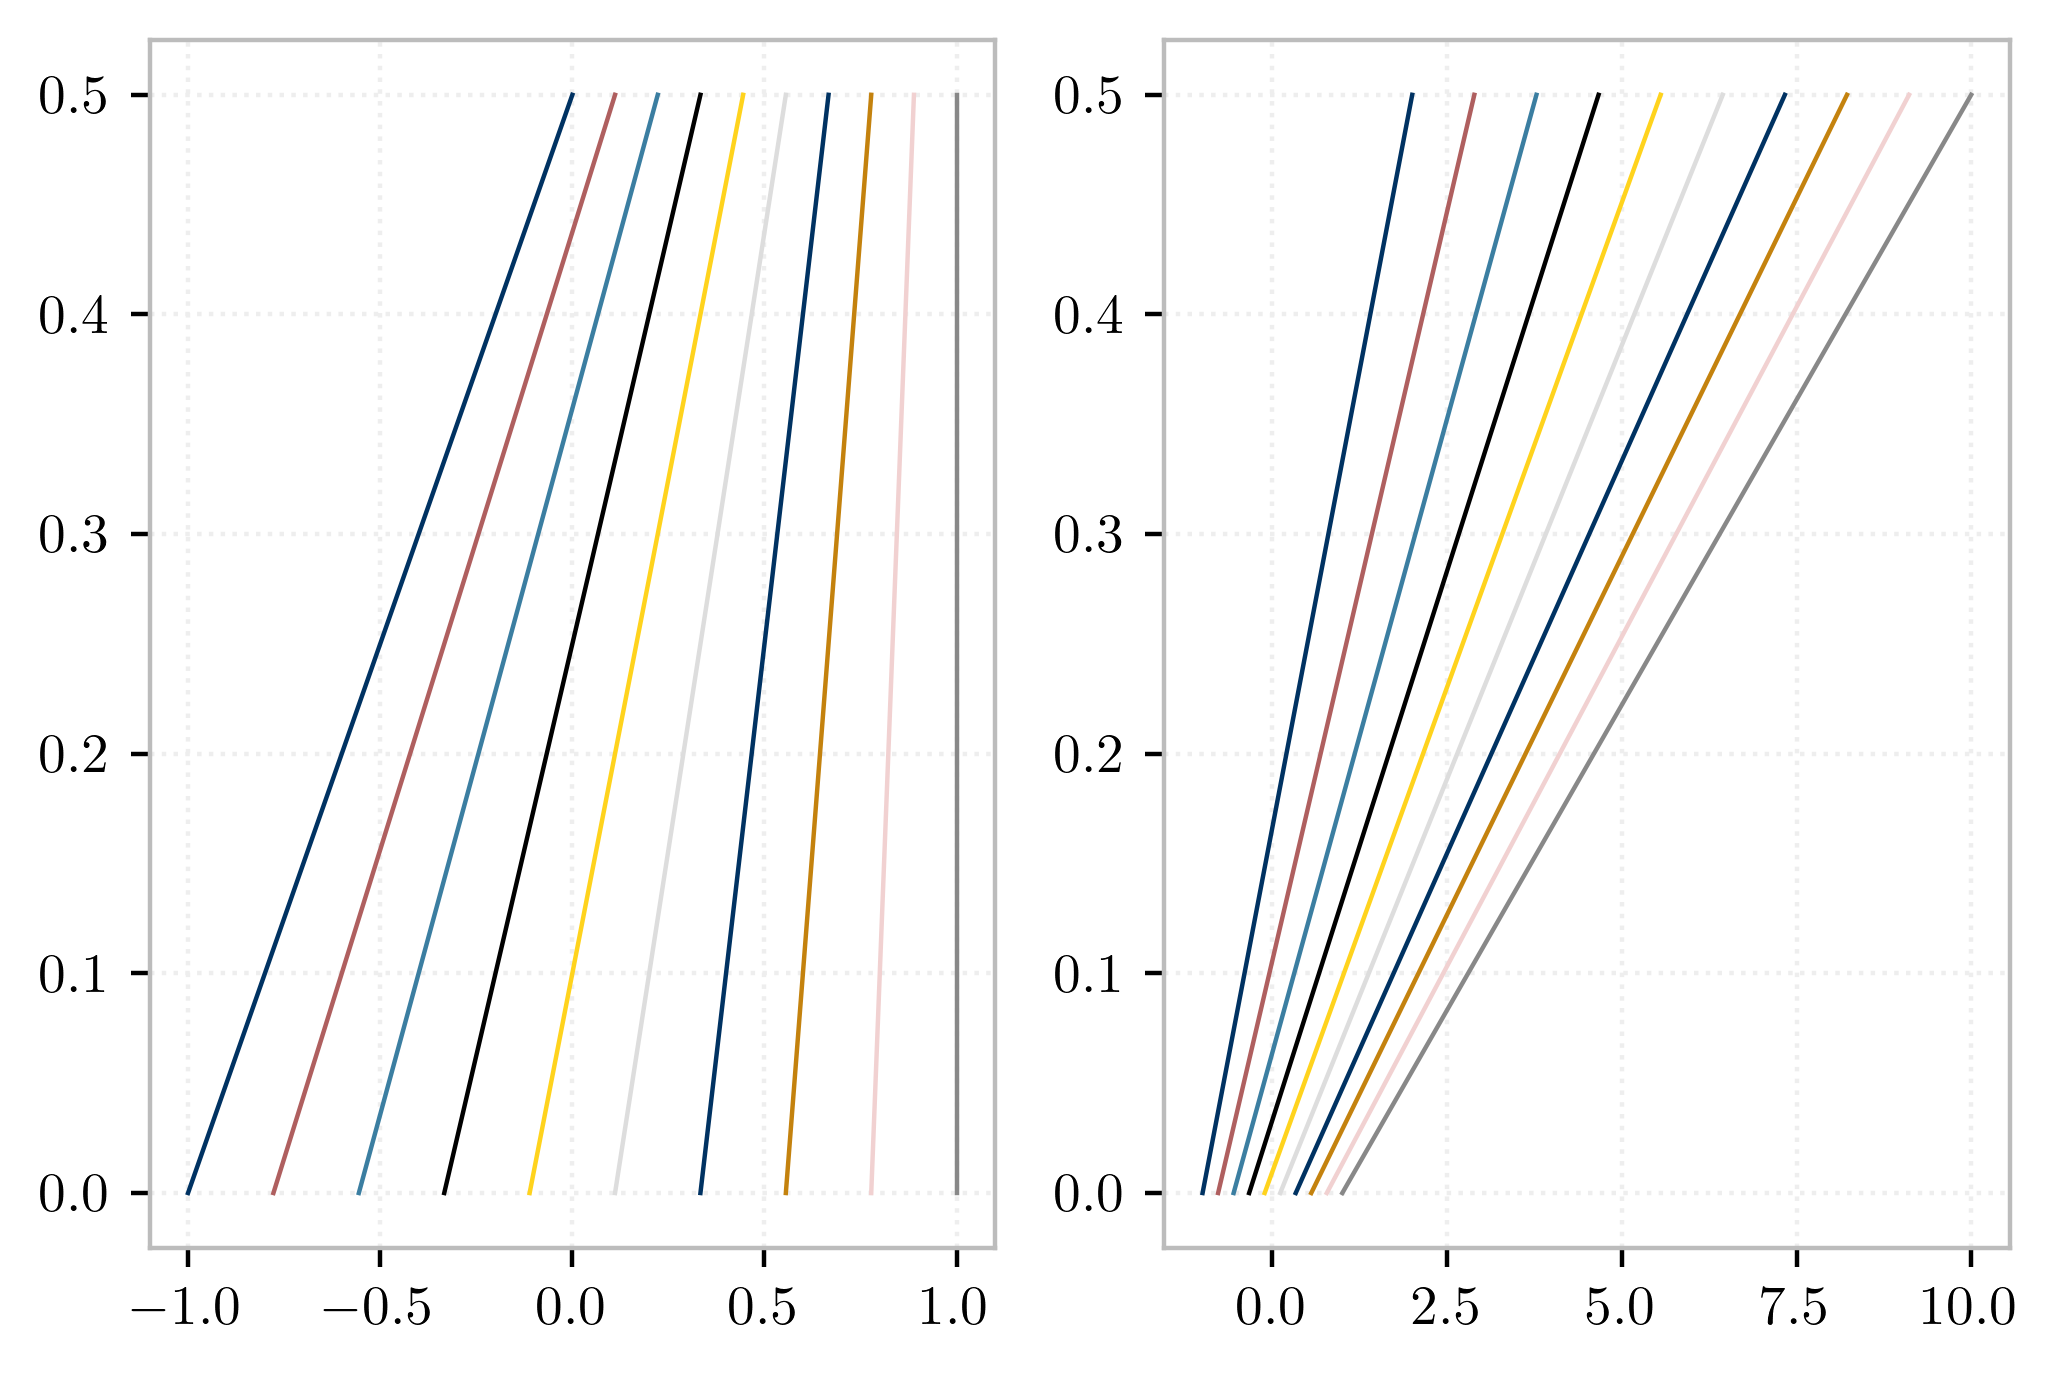

In [17]:
fix,ax = plt.subplots(1,2)
for el,rng in enumerate([np.linspace(0,1,5), np.linspace(2,10,5)]):
    for xi in np.linspace(-1,1,10):
        ax[el].plot([xi,transf(xi,rng)], [0,0.5])

In [18]:
print(xi_in_x.diff("xi"))

x_0*(8*xi**3/3 - 2*xi**2 - xi/3 + 1/6) + x_1*(-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3) + x_2*(16*xi**3 - 10*xi) + x_3*(-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3) + x_4*(8*xi**3/3 + 2*xi**2 - xi/3 - 1/6)


In [19]:
def grad_transf(xi,x_nodes):
    return (x_nodes[0]*(8*xi**3/3 - 2*xi**2 - xi/3 + 1/6) 
          + x_nodes[1]*(-32*xi**3/3 + 4*xi**2 + 16*xi/3 - 4/3) 
          + x_nodes[2]*(16*xi**3 - 10*xi) 
          + x_nodes[3]*(-32*xi**3/3 - 4*xi**2 + 16*xi/3 + 4/3) 
          + x_nodes[4]*(8*xi**3/3 + 2*xi**2 - xi/3 - 1/6)
    )

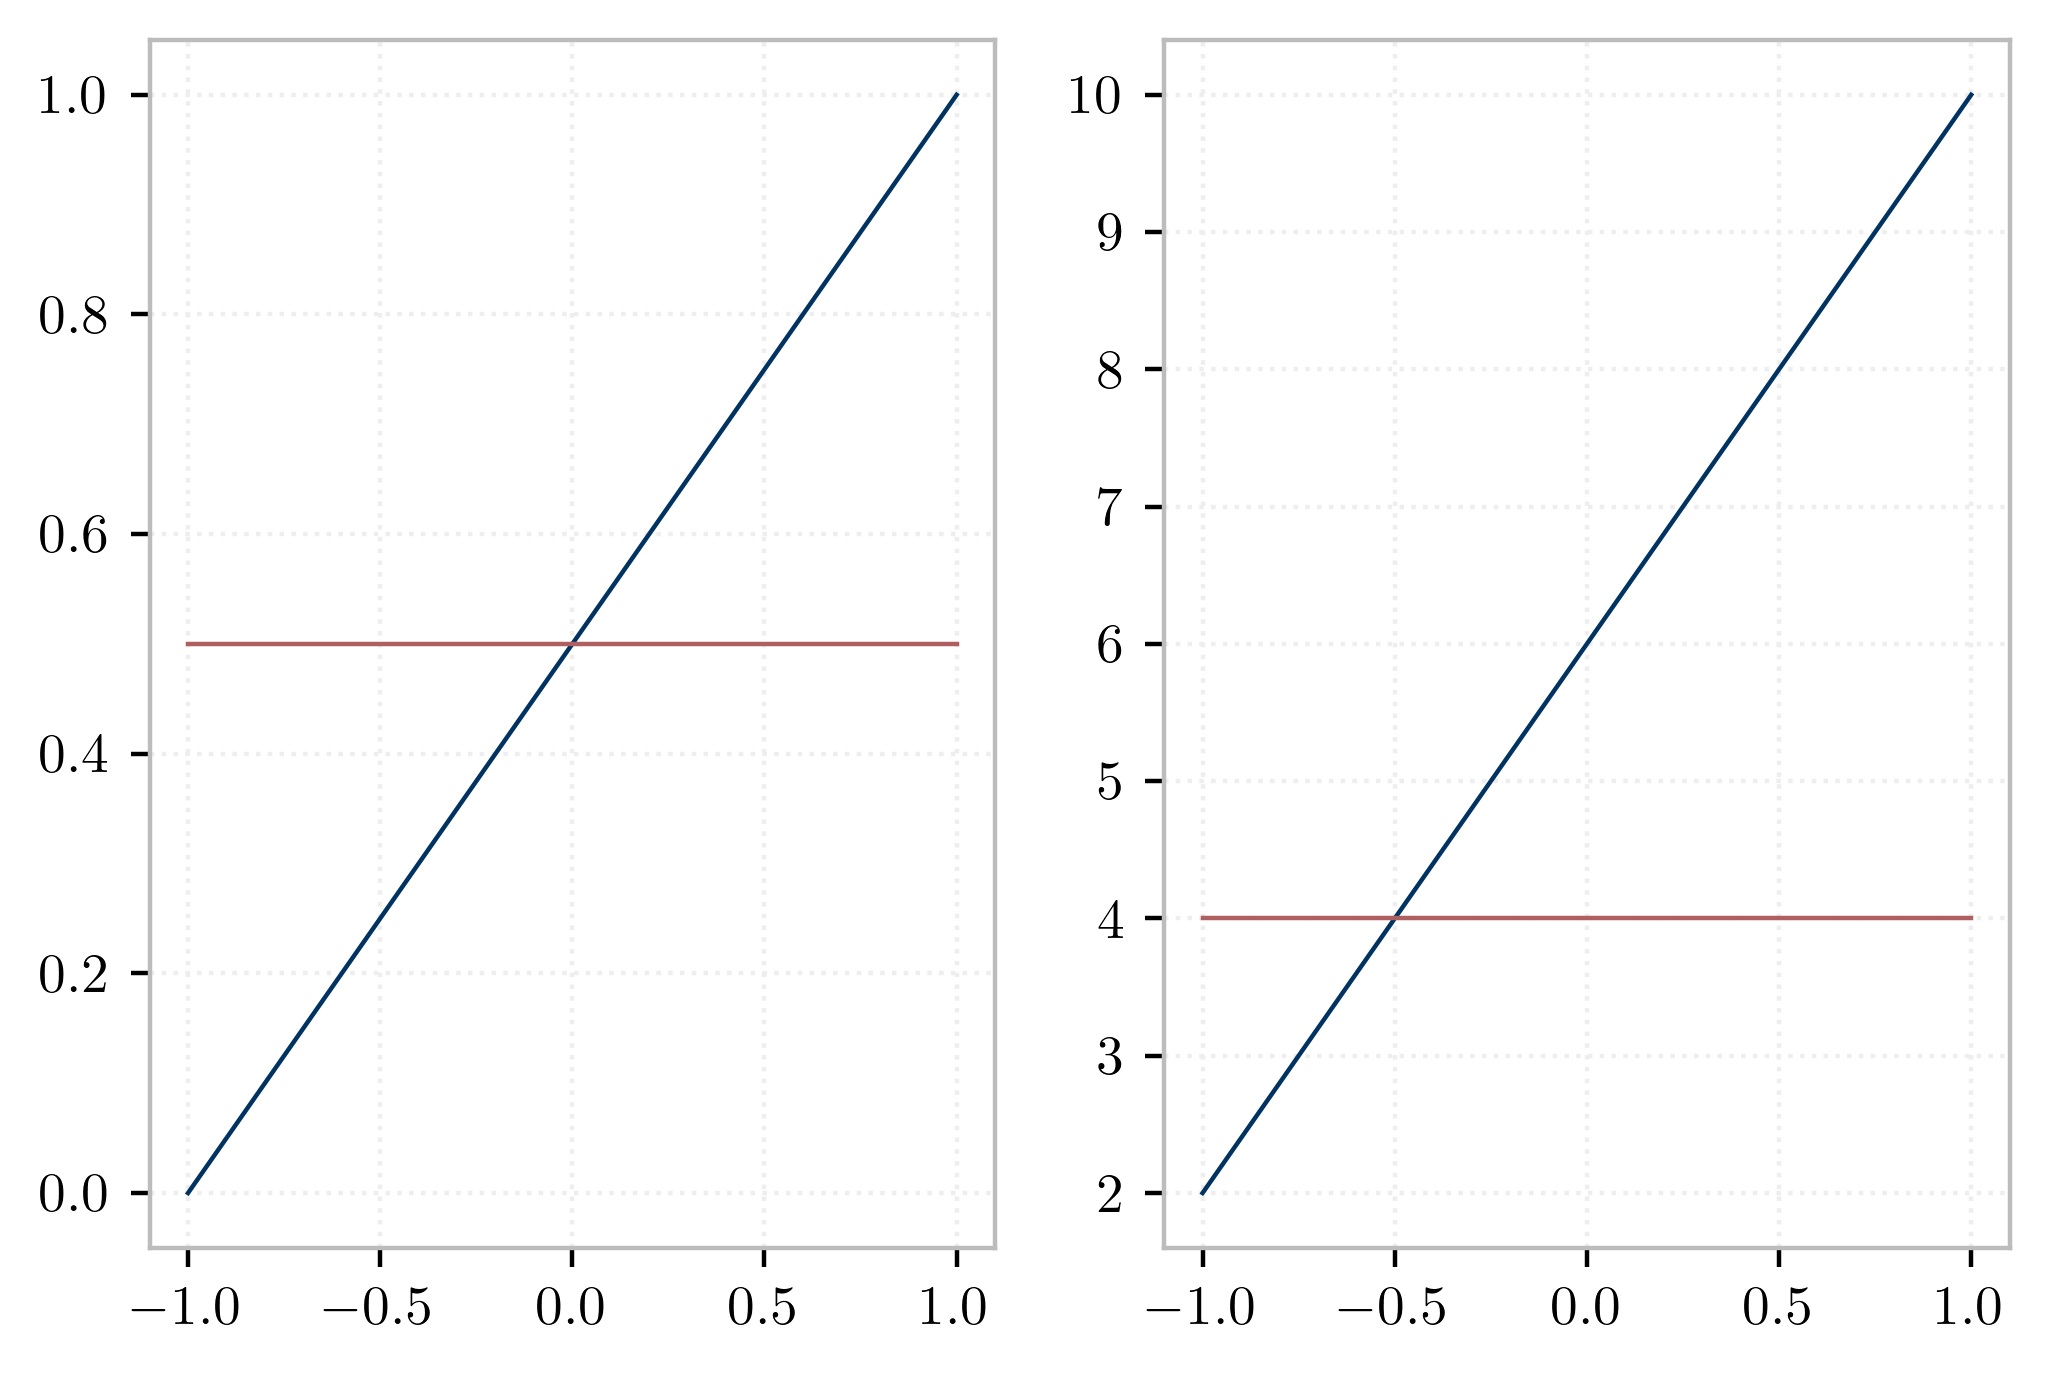

In [20]:
fix,ax = plt.subplots(1,2)
for el,rng in enumerate([np.linspace(0,1,5), np.linspace(2,10,5)]):
        ax[el].plot(*zip(*[[xi,transf(xi,rng)] for xi in np.linspace(-1,1,10)]))
        ax[el].plot(*zip(*[[xi,grad_transf(xi,rng)] for xi in np.linspace(-1,1,10)]))

## A

In [37]:
for i in range(5):
    print(f"    [{', '.join(str(a[i][j]) for j in range(0,5))}],")# + a2*i_phiphi[i][j]},")
print("\n")
for i in range(5):
    print(f"    [{', '.join(str(i_phiphi[i][j]) for j in range(0,5))}],")# + a2*i_phiphi[i][j]},")

    [985/378, -3424/945, 508/315, -736/945, 347/1890],
    [-3424/945, 1664/189, -2368/315, 2944/945, -736/945],
    [508/315, -2368/315, 248/21, -2368/315, 508/315],
    [-736/945, 2944/945, -2368/315, 1664/189, -3424/945],
    [347/1890, -736/945, 508/315, -3424/945, 985/378],


    [292/2835, 296/2835, -58/945, 8/405, -29/2835],
    [296/2835, 256/405, -128/945, 256/2835, 8/405],
    [-58/945, -128/945, 208/315, -128/945, -58/945],
    [8/405, 256/2835, -128/945, 256/405, 296/2835],
    [-29/2835, 8/405, -58/945, 296/2835, 292/2835],


In [22]:
for i in range(5):
    print("  [")
    for j in range(0,5):
        print(f"    {a2*i_phiphi[i][j]},")
    print("  ],")

In [25]:
quad_points(n=5,rule="gauss-legendre")

(array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]),
 array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]))

## Load

In [26]:
for i in range(5):
    print(f"    [f(transf(xi,x_nodes))*({phi[i]})],")

    [f(transf(xi,x_nodes))*(2*xi**4/3 - 2*xi**3/3 - xi**2/6 + xi/6)],
    [f(transf(xi,x_nodes))*(-8*xi**4/3 + 4*xi**3/3 + 8*xi**2/3 - 4*xi/3)],
    [f(transf(xi,x_nodes))*(4*xi**4 - 5*xi**2 + 1)],
    [f(transf(xi,x_nodes))*(-8*xi**4/3 - 4*xi**3/3 + 8*xi**2/3 + 4*xi/3)],
    [f(transf(xi,x_nodes))*(2*xi**4/3 + 2*xi**3/3 - xi**2/6 - xi/6)],


In [27]:
quad = quad_points(n=5,rule="gauss-legendre")

def load(f,xyz,a1=a1,a2=a2):
    x_nodes = [ x[0] for x in xyz]
    return sum([
          np.array([
            [f(transf(xi,x_nodes))*2*xi**4/3 - 2*xi**3/3 - xi**2/6 + xi/6],
            [f(transf(xi,x_nodes))*-8*xi**4/3 + 4*xi**3/3 + 8*xi**2/3 - 4*xi/3],
            [f(transf(xi,x_nodes))*4*xi**4 - 5*xi**2 + 1],
            [f(transf(xi,x_nodes))*-8*xi**4/3 - 4*xi**3/3 + 8*xi**2/3 + 4*xi/3],
            [f(transf(xi,x_nodes))*2*xi**4/3 + 2*xi**3/3 - xi**2/6 - xi/6],
          ]
        )*w/grad_transf(xi,x_nodes) for xi, w in zip(*quad)
    ])


In [28]:
load(np.sin,np.linspace(0,1,5)[:,None])

array([[ 0.01100907],
       [ 2.62263041],
       [-1.26727894],
       [ 2.62263041],
       [ 0.01100907]])

In [29]:
a

[[985/378, -3424/945, 508/315, -736/945, 347/1890],
 [-3424/945, 1664/189, -2368/315, 2944/945, -736/945],
 [508/315, -2368/315, 248/21, -2368/315, 508/315],
 [-736/945, 2944/945, -2368/315, 1664/189, -3424/945],
 [347/1890, -736/945, 508/315, -3424/945, 985/378]]